# KPMG Virtual Internship 1

Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [3]:
# Importing datasets
transactions = pd.read_excel("../KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
customer_address = pd.read_excel("../KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')
customer_demographic = pd.read_excel("../KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
customer_list = pd.read_excel("../KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')

# Datasets list
Datasets = [transactions, customer_address, customer_demographic]

# Data Cleaning

In [4]:
transactions.sample(6)  # Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7040,7041,1,3131,2017-02-19,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,41167.0
12601,12602,85,2226,2017-11-11,1.0,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,42218.0
6464,6465,75,583,2017-10-02,1.0,Approved,Giant Bicycles,Touring,medium,large,1873.97,863.95,38859.0
3866,3867,13,1396,2017-07-05,0.0,Approved,Solex,Standard,medium,medium,1163.89,589.27,42560.0
7113,7114,19,1624,2017-08-26,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34165.0
6146,6147,34,3029,2017-02-17,1.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,37698.0


In [5]:
customer_address.sample(6)

,customer_id,address,postcode,state,country,property_valuation
2415,2420,290 Jay Drive,4210,QLD,Australia,3
3752,3757,20101 Prentice Terrace,2074,NSW,Australia,11
3098,3103,32304 Larry Road,4014,QLD,Australia,7
3325,3330,75106 Oriole Junction,2030,NSW,Australia,12
2637,2642,3 Old Gate Hill,4106,QLD,Australia,5
1156,1161,0386 Mayfield Way,4122,QLD,Australia,7


In [6]:
customer_demographic.sample(6)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3274,3275,Lela,Carrell,Female,24,1975-10-22 00:00:00,Computer Systems Analyst IV,Manufacturing,Mass Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,6.0
3373,3374,Joann,Corrigan,Female,77,1959-11-17 00:00:00,Sales Associate,Manufacturing,Mass Customer,N,0/0,Yes,12.0
1065,1066,Hailey,Ricciardi,Male,45,1995-10-06 00:00:00,Recruiter,Telecommunications,High Net Worth,N,ï¼ï¼ï¼,No,12.0
54,55,Linc,Jillions,Male,48,1956-09-24 00:00:00,Paralegal,Financial Services,Affluent Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,7.0
65,66,Anselm,Gawne,Male,46,2002-03-11 00:00:00,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
3725,3726,Ange,Austick,Female,36,1976-06-17 00:00:00,GIS Technical Architect,Property,Mass Customer,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",No,19.0


In [8]:
# for _ in Datasets:
#     print(_.info())

In [9]:
customer_demographic.rename({'past_3_years_bike_related_purchases': 'past_3_years_purchases'}, axis=1, inplace=True)

Customer ID can be used to join the data.

Columns of concern:
- transactions['product_first_sold_date']
- customer_demographic['default']
- customer_demographic['DOB'] should be datetime format

In [10]:
customer_demographic['DOB'] = pd.to_datetime(customer_demographic['DOB'])

In [11]:
transactions['product_first_sold_date'].sample(10)

2934     42172.0
14742    37539.0
13996    38193.0
18569    37823.0
16863    38482.0
17479    36334.0
17226    40649.0
14636    42710.0
2113     38482.0
18553        NaN
Name: product_first_sold_date, dtype: float64

In [12]:
customer_demographic['default'].sample(10)

2668                                           __ï¾(,_,*)
2739               /dev/null; touch /tmp/blns.fail ; echo
119                                                â°â´âµ
3421                                                    '
3043    ×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...
1547                                                  100
544                <svg><script>0<1>alert('XSS')</script>
648                                                     á
1483                                              é¨è½æ ¼
2008                                                   "'
Name: default, dtype: object

In [13]:
transactions.drop('product_first_sold_date', axis=1, inplace=True)
customer_demographic.drop('default', axis=1, inplace=True)

## Nan Values Check

In [14]:
transactions.isna().sum() / transactions.shape[0] * 100

transaction_id      0.000
product_id          0.000
customer_id         0.000
transaction_date    0.000
online_order        1.800
order_status        0.000
brand               0.985
product_line        0.985
product_class       0.985
product_size        0.985
list_price          0.000
standard_cost       0.985
dtype: float64

In [15]:
customer_address.isna().sum() / customer_address.shape[0] * 100

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [16]:
customer_demographic.isna().sum() / customer_demographic.shape[0] * 100

customer_id                0.000
first_name                 0.000
last_name                  3.125
gender                     0.000
past_3_years_purchases     0.000
DOB                        2.175
job_title                 12.650
job_industry_category     16.400
wealth_segment             0.000
deceased_indicator         0.000
owns_car                   0.000
tenure                     2.175
dtype: float64

Transactions Data

- Brand and product related columns are difficult to fill considering the sensitivity of this information to the analysis. Therefore missing values will be dropped

Customer Address Data has no missing values

Customer Demographic 

- job related columns have a sizeable number of missing values and are sensitive to the analysis
  - Consider dropping them since only about ~ 500 values are missing leaving > 3500 records
- DOB values should also be dropped

In [17]:
transactions.dropna(subset=['brand', 'product_class', 'product_line', 'product_size'], inplace=True)
customer_demographic.dropna(subset=['job_title', 'job_industry_category', 'DOB'], inplace=True)

In [20]:
# for df in Datasets:
#     print(df.info())

Transactions

- Numeric = transaction_id, product_id, customer_id, online_order, list_price, standard_cost
- Datetime = transaction_date
- Object = order_status, brand, product_line, product_class, product_size

Customer Address
- Numeric = customer_id, postcode, property_valuation
- object = address, state, country

Customer Demographic
- Numeric = customer_id, past_3_years_purchases, tenure
- Datetime = DOB
- Object = first_name, last_name, gender, job_title, job_industry_category, wealth_segment, deceased_indicator

In [19]:
transactions['online_order'].value_counts()

online_order
1.0    9739
0.0    9706
Name: count, dtype: int64

Since there is a balance of classes in online_order, filling with ffill or bfill is a better method. Also renaming Nan last_names to unknown to preserve the data.

In [22]:
transactions['online_order'].fillna(method='ffill', inplace=True)

In [23]:
customer_demographic['last_name'].fillna(value='Unknown', inplace=True)

## Outliers Check

In [24]:
num_transactions = ['list_price', 'standard_cost', 'transaction_date']
num_address = ['property_valuation']
num_demographic = ['DOB', 'past_3_years_purchases', 'tenure']

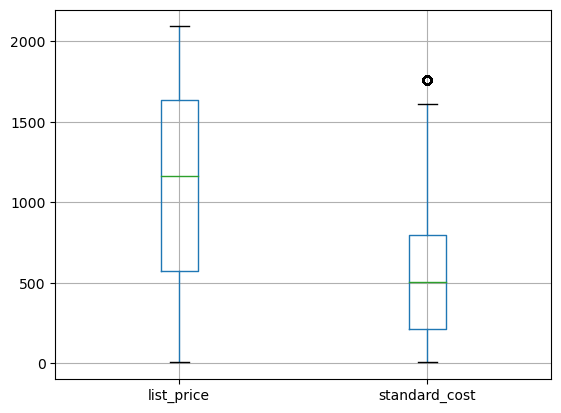

In [25]:
transactions[num_transactions].boxplot();

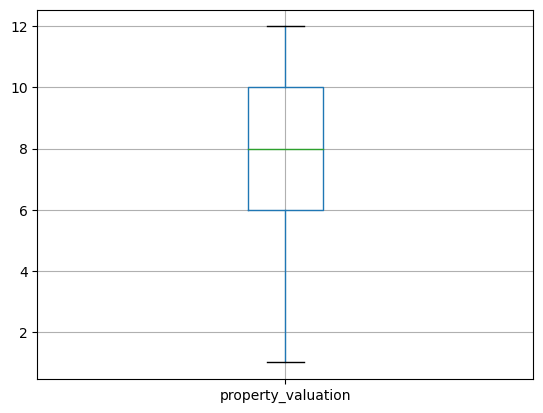

In [26]:
customer_address[num_address].boxplot();

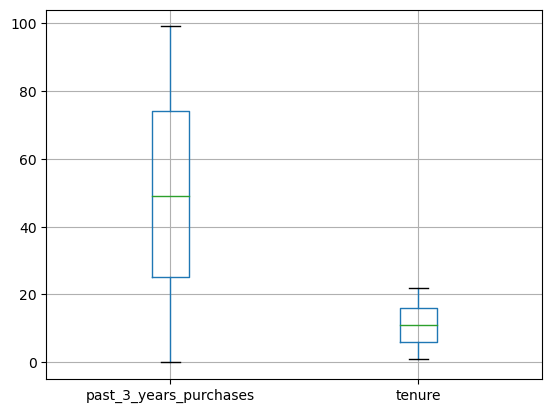

In [28]:
customer_demographic[num_demographic].boxplot();

There is an outlier in transactions dataset's standard_cost

In [29]:
# Fuction for removing outliers
def filter_outliers(df, column):
    Q1 = df[column].quantile(q=0.25)
    Q3 = df[column].quantile(q=0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR

    return (df[column] < lower_limit) | (df[column] > upper_limit)

In [30]:
# Removing outliers in transactions
transactions_mask = filter_outliers(transactions, 'standard_cost')
transactions = transactions[~transactions_mask]

In [31]:
transactions['transaction_date'].agg(['min', 'max'])

min   2017-01-01
max   2017-12-30
Name: transaction_date, dtype: datetime64[ns]

In [32]:
customer_demographic['DOB'].agg(['min', 'max'])

min   1843-12-21
max   2002-03-11
Name: DOB, dtype: datetime64[ns]

In [33]:
# Dropping 1843-12-21 00:00:00 value
customer_demographic = customer_demographic[~(customer_demographic['DOB'] == '1843-12-21 00:00:00')].copy()

## Object columns Exploration & Cleaning

In [34]:
obj_transactions = ['order_status', 'brand', 'product_line', 'product_class', 'product_size'] 
obj_address = ['address', 'state', 'country']
obj_demographic = ['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator']

In [35]:
# for col in obj_transactions:
#     print(transactions[col].value_counts(), '\n')

In [36]:
# for col in obj_address:
#     print(customer_address[col].value_counts(), '\n')

In [37]:
# for col in obj_demographic:
#     print(customer_demographic[col].value_counts(), '\n')

Transactions has no errors in recording

Customer Address state column has some errors (new south wales instead of NSW and Victoria instead of VIC)

Customer Demographic gender column has errors (F and Femal instead of Female)

In [38]:
customer_address['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'}, inplace=True)
customer_demographic['gender'].replace({'Femal': 'Female', 'F': 'Female'}, inplace=True)

In [39]:
# for _ in Datasets:
#     print(_.info())

# Joining the datasets

The other datasets will be merged into the transactions dataset using the customer_id column.

In [40]:
for _ in Datasets:
    print(_['customer_id'].nunique())

3494
3999
2865


The customer id total records are not equal in number in the datasets.

In [41]:
# Joining the datasets
data = transactions.merge(customer_address, on='customer_id', how='left', suffixes=('_transactions', '_address')).merge(customer_demographic, on='customer_id', how='left', suffixes=('_address', '_demographic'))

In [44]:
data.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
11072,11281,44,2873,2017-01-02,0.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,62293 Raven Parkway,2486.0,NSW,Australia,8.0,Elvina,Saiger,Female,59.0,1981-06-25,Cost Accountant,Financial Services,Mass Customer,N,No,13.0
3954,4015,46,3451,2017-11-19,1.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,4233 Service Avenue,2340.0,NSW,Australia,5.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
11263,11474,46,1964,2017-02-27,0.0,Approved,Solex,Standard,low,medium,1289.85,74.51,7 Del Mar Crossing,4680.0,QLD,Australia,7.0,Cara,Campbell-Dunlop,Female,60.0,1964-06-19,Mechanical Systems Engineer,Financial Services,Affluent Customer,N,Yes,9.0
12097,12326,48,381,2017-09-05,0.0,Approved,WeareA2B,Standard,medium,medium,1762.96,950.52,010 Namekagon Parkway,2062.0,NSW,Australia,12.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1124,1144,4,1288,2017-09-21,1.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,55 Elgar Park,4306.0,QLD,Australia,7.0,Abra,Cuardall,Female,51.0,1979-10-07,Desktop Support Technician,Financial Services,Affluent Customer,N,Yes,18.0


In [45]:
data.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
address                     30
postcode                    30
state                       30
country                     30
property_valuation          30
first_name                5440
last_name                 5440
gender                    5440
past_3_years_purchases    5440
DOB                       5440
job_title                 5440
job_industry_category     5440
wealth_segment            5440
deceased_indicator        5440
owns_car                  5440
tenure                    5440
dtype: int64

Due to the unmatched ID records there are a number of missing values

In [46]:
data[data.isna().any(axis=1)].sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
17840,18192,59,513,2017-01-04,1.0,Approved,Solex,Standard,medium,large,1061.56,733.58,5723 Raven Drive,3126.0,VIC,Australia,12.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
10013,10209,88,2548,2017-10-07,1.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,12 Fairfield Parkway,3029.0,VIC,Australia,7.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5021,5109,70,381,2017-05-07,1.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,010 Namekagon Parkway,2062.0,NSW,Australia,12.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5858,5960,0,2159,2017-07-11,0.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,1788 Columbus Trail,4510.0,QLD,Australia,4.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9284,9463,49,1823,2017-04-26,0.0,Approved,Solex,Standard,medium,large,1061.56,733.58,1164 Toban Road,3806.0,VIC,Australia,5.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Dropping records with missing values
data.dropna(inplace=True)

In [48]:
data.shape

(14155, 28)

# Step 2

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

Tips: Raw data fields may be transformed into other calculated fields for modelling purposes (i.e. converting D.O.B to age or age groups). Tips: You may source external data from the ABS / Census to add additional variables that may help support your model. 